## <b> Лабораторна робота №1 
"Використання бібліотек Pandas та Matplotlib"\
Виконала: Челюскіна Юлія КМ-21 (2-га підгрупа)

---

### Початкові дані (1)

In [1]:
import pandas as pd
df  = pd.read_csv("Vehicle_Sales.csv", delimiter=",")
df



,Year,Month,New,Used,Total Sales New,Total Sales Used
0,2002,JAN,31106,49927,$755015820,$386481929
1,2002,FEB,27520,50982,$664454223,$361353242
2,2002,MAR,34225,58794,$805666244,$419385387
3,2002,APR,36452,59817,$846368297,$433061150
4,2002,MAY,37359,60577,$855005784,$442569410
...,...,...,...,...,...,...
181,2017,FEB,22413,55989,$776222008,$592255229
182,2017,MAR,27838,72717,$926703144,$744746293
183,2017,APR,26135,62740,$867722291,$654981615
184,2017,MAY,28931,68296,$937804113,$718689038


### Попередні спостереження (2)


In [2]:
#df.shape #rows, columns
print ("Кількість записів ", df.shape[0], ", кількість полів у кожному записі ", df.shape[1])

Кількість записів  186 , кількість полів у кожному записі  6


Тобто досліджувалось 186 місяців, але 186 / 12 = 15,5, отже деякі роки не мають повних данних

In [3]:
df.groupby("Year")["Month"].count()

Year
2002    12
2003    12
2004    12
2005    12
2006    12
2007    12
2008    12
2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017     6
Name: Month, dtype: int64

Отже 2017 рік містить записи лише за 6 місяців, що потрібно враховувати при аналізі даних

### Видалення 2017 (*)

In [ ]:
#ВИДАЛЕННЯ 2017
df = df[df["Year"]<2017]
df

### Завдання (3-4)

In [4]:
# K = 22
df.iloc[:((22+7))]

,Year,Month,New,Used,Total Sales New,Total Sales Used
0,2002,JAN,31106,49927,$755015820,$386481929
1,2002,FEB,27520,50982,$664454223,$361353242
2,2002,MAR,34225,58794,$805666244,$419385387
3,2002,APR,36452,59817,$846368297,$433061150
4,2002,MAY,37359,60577,$855005784,$442569410
5,2002,JUN,36348,55415,$830251613,$414731166
6,2002,JUL,30367,55235,$700530891,$384673023
7,2002,AUG,38965,60310,$934484212,$455453720
8,2002,SEP,39740,55485,$950502055,$432112270
9,2002,OCT,35276,58020,$865326154,$456738532


In [5]:
# K = 22
df.iloc[-(5*22-3):]

,Year,Month,New,Used,Total Sales New,Total Sales Used
79,2008,AUG,25666,53455,$663384108,$411849673
80,2008,SEP,26751,51206,$697999898,$398834140
81,2008,OCT,23216,50727,$614717936,$382437406
82,2008,NOV,16842,39803,$447337415,$295521964
83,2008,DEC,17220,42611,$469069897,$329674280
...,...,...,...,...,...,...
181,2017,FEB,22413,55989,$776222008,$592255229
182,2017,MAR,27838,72717,$926703144,$744746293
183,2017,APR,26135,62740,$867722291,$654981615
184,2017,MAY,28931,68296,$937804113,$718689038


In [7]:
df.dtypes

Year                 int64
Month               object
New                  int64
Used                 int64
Total Sales New     object
Total Sales Used    object
dtype: object

### Зміна датафрейму (5-7)

In [8]:
#checking type of sales
df.dtypes[["Total Sales Used", "Total Sales New"]]

Total Sales Used    object
Total Sales New     object
dtype: object

In [9]:
#obj to int for sales
df["Total Sales New"] = df["Total Sales New"].str.replace('$','').astype(int)
df["Total Sales Used"] = df["Total Sales Used"].str.replace('$','').astype(int)


In [10]:
df["Total"] = df["New"]+df["Used"] #обсяг продаж
df["Total Sales"]  = df["Total Sales New"]+df["Total Sales Used"] #дохід
df["Difference"] = abs(df["New"]-df["Used"]) #різниця в продажах
df


,Year,Month,New,Used,Total Sales New,Total Sales Used,Total,Total Sales,Difference
0,2002,JAN,31106,49927,755015820,386481929,81033,1141497749,18821
1,2002,FEB,27520,50982,664454223,361353242,78502,1025807465,23462
2,2002,MAR,34225,58794,805666244,419385387,93019,1225051631,24569
3,2002,APR,36452,59817,846368297,433061150,96269,1279429447,23365
4,2002,MAY,37359,60577,855005784,442569410,97936,1297575194,23218
...,...,...,...,...,...,...,...,...,...
181,2017,FEB,22413,55989,776222008,592255229,78402,1368477237,33576
182,2017,MAR,27838,72717,926703144,744746293,100555,1671449437,44879
183,2017,APR,26135,62740,867722291,654981615,88875,1522703906,36605
184,2017,MAY,28931,68296,937804113,718689038,97227,1656493151,39365


In [11]:
#Змінити порядок розташування полів
dr_old = df
df = dr_old[["Year", "Month", 
             "Total Sales", "Total Sales New", "Total Sales Used", 
             "Total", "New", "Used","Difference"]]
df

,Year,Month,Total Sales,Total Sales New,Total Sales Used,Total,New,Used,Difference
0,2002,JAN,1141497749,755015820,386481929,81033,31106,49927,18821
1,2002,FEB,1025807465,664454223,361353242,78502,27520,50982,23462
2,2002,MAR,1225051631,805666244,419385387,93019,34225,58794,24569
3,2002,APR,1279429447,846368297,433061150,96269,36452,59817,23365
4,2002,MAY,1297575194,855005784,442569410,97936,37359,60577,23218
...,...,...,...,...,...,...,...,...,...
181,2017,FEB,1368477237,776222008,592255229,78402,22413,55989,33576
182,2017,MAR,1671449437,926703144,744746293,100555,27838,72717,44879
183,2017,APR,1522703906,867722291,654981615,88875,26135,62740,36605
184,2017,MAY,1656493151,937804113,718689038,97227,28931,68296,39365


### Завдання (8-9)


In [12]:
#Рік та місяць, у які нових автомобілів було продано менше за б/в
df[df["New"]<df["Used"]][["Year", "Month"]]

,Year,Month
0,2002,JAN
1,2002,FEB
2,2002,MAR
3,2002,APR
4,2002,MAY
...,...,...
181,2017,FEB
182,2017,MAR
183,2017,APR
184,2017,MAY


In [13]:
#Рік та місяць, коли сумарний дохід був мінімальним
df[df["Total Sales"] == df["Total Sales"].min()][["Year", "Month"]]

,Year,Month
97,2010,FEB


In [14]:
#Рік та місяць, коли було продано найбільше б/в авто
df[df["Used"] == df["Used"].max()][["Year", "Month"]]

,Year,Month
170,2016,MAR


In [15]:
#Сумарний обсяг продажу транспортних засобів за кожен рік
df.groupby("Year")["Total"].sum()

Year
2002    1058253
2003    1103610
2004    1128185
2005    1125669
2006    1096250
2007    1056733
2008     927044
2009     857817
2010     894067
2011     913397
2012     944440
2013     979964
2014     997685
2015    1054364
2016    1096509
2017     550131
Name: Total, dtype: int64

In [16]:
#Середній дохід від продажу б/в транспортних засобів в місяці М
M = "JUL"
df[df["Month"] == M]["Total Sales Used"].mean()

504390984.8666667

### Plotting (10-12)

<Axes: xlabel='Month'>

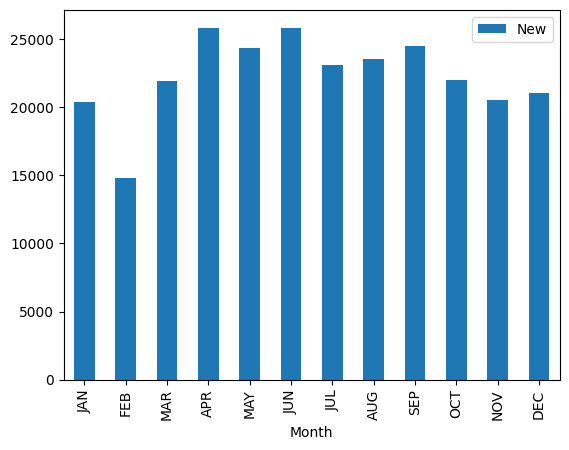

In [17]:
#Побудувати стовпчикову діаграму обсягу продаж нових авто у році 2010
df[df["Year"] == 2010].plot(kind="bar",x="Month", y = "New")

<Axes: ylabel='Total'>

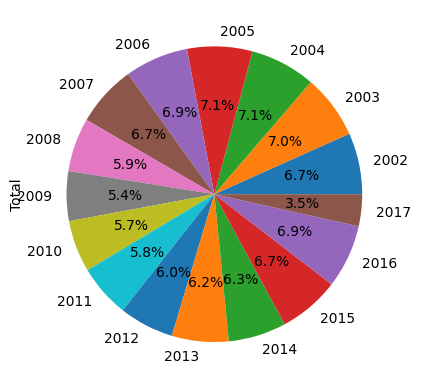

In [18]:
#Побудувати кругову діаграму сумарного обсягу продаж за кожен рік.
year_sum = df.groupby("Year")["Total"].sum()
year_sum.plot(kind="pie", autopct='%1.1f%%')

<Axes: xlabel='Year'>

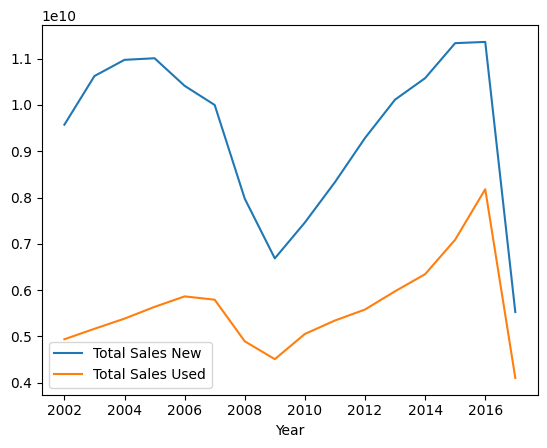

In [19]:
#Побудувати на одному графіку:
#a. Сумарний дохід від продажу нових авто;
#b. Сумарний дохід від продажу старих авто.

df.groupby("Year")[["Total Sales New", "Total Sales Used"]].sum().plot()


### Додаткові графіки

array([[<Axes: xlabel='Year'>, <Axes: xlabel='Year'>]], dtype=object)

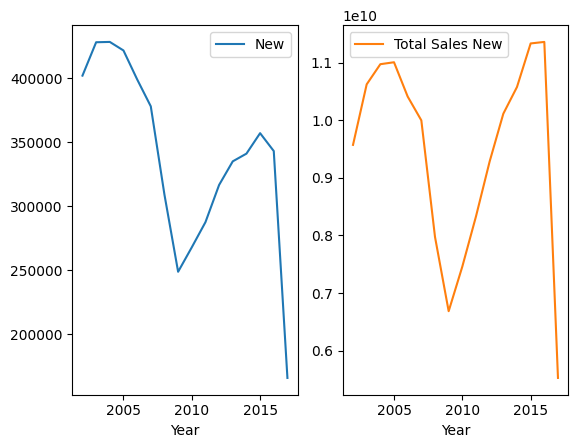

In [20]:
#ДОДАТКОВИЙ ГРАФІК

#Порівняння обсягів продажів нових машин та доходу вді нових машин за кожен рік
#Справа графік по Y визначає прибуток в десятках мільярдів (^10)
df.groupby("Year")[["New","Total Sales New"]].sum().plot(subplots=True, layout=(1,2))

<Axes: xlabel='Year'>

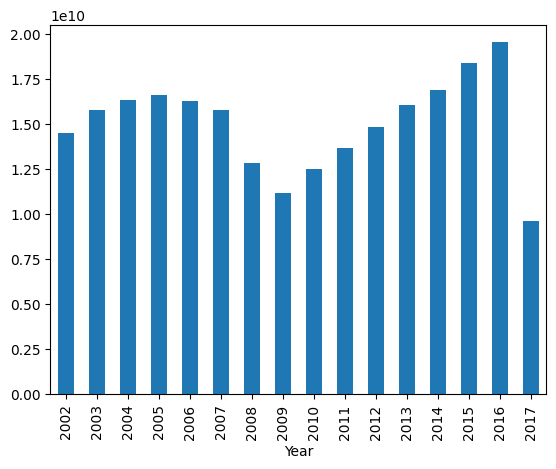

In [21]:
#ДОДАТКОВИЙ ГРАФІК 

#дохід за кожен рік
df.groupby("Year")["Total Sales"].sum().plot(kind="bar")